# Super Learner Demo

## Import Packages Etc

In [72]:
from IPython.display import display, HTML, Image

# import local module
from SLC import SuperLearnerClassifier

import pandas as pd
import numpy as np

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# to install autotime as conda package, run:
# conda install -c conda-forge ipython-autotime
import autotime
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 11 ms


### Set the number of CPU cores to be used when parallel processing is possible. 

In [3]:
# Setting n_jobs higher than 1 can cause freeze-ups during cross validations
# This is a known issue under Windows OS when using cross validation in scikit-learn, see: 
# https://github.com/scikit-learn/scikit-learn/issues/5115

# Apparently the problem can effect Linux/OSX too though, see: http://scikit-learn.org/stable/faq.html
# Doesn't happen to everyone, so feel free to try using more cores.  

# Set cores variable = n_jobs desired
cores = 1

time: 1e+03 µs


### Simple Iris Test of SuperLearnerClassifier

Perform a simple test using the SuperLearnClassifier on the Iris dataset

In [4]:
from sklearn.datasets import load_iris
# using Multi-layer Perceptron classifier as stack learner, as default decision tree does a dreadful job
# (Presumably due to its hyperparameters, which are tuned to the MNIST dataset)
slclf = SuperLearnerClassifier(stack_estimator = 'mlpc', n_jobs = 3)
iris = load_iris()
# print (slclf.classes_)
slclf.fit(iris.data, iris.target)
#cross_val_score(slclf, iris.data, iris.target, cv=StratifiedKFold(n_splits=10, shuffle=True))
cross_val_score(slclf, iris.data, iris.target, cv=10)

array([ 1.        ,  1.        ,  1.        ,  0.86666667,  0.86666667,
        0.93333333,  0.93333333,  1.        ,  1.        ,  1.        ])

time: 1min 33s


In [5]:
predictions = slclf.predict(iris.data)
accuracy = accuracy_score(iris.target, predictions)
print("Classification Report: \n", classification_report(iris.target, predictions))

Classification Report: 
              precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       1.00      0.90      0.95        50
          2       0.91      1.00      0.95        50

avg / total       0.97      0.97      0.97       150

time: 232 ms


In [6]:
# Print accuracy
print("Accuracy: " +  str(accuracy))

# Print confusion matrix
print("\n Confusion Matrix")
display(pd.crosstab(np.array(iris.target), predictions, rownames=['True'], colnames=['Predicted'], margins=True))

Accuracy: 0.966666666667

 Confusion Matrix


Predicted,0,1,2,All
True,,,,
0,50,0,0,50
1,0,45,5,50
2,0,0,50,50
All,50,45,55,150


time: 34 ms


## Testing on MNIST fashion data

Adjust dataset sample ratio below (1 = full dataset)

In [7]:
data_sampling_rate = 0.1

Error in callback <bound method LineWatcher.stop of <autotime.LineWatcher object at 0x0000000009888550>> (for post_run_cell):


AssertionError: 

### Load + Pre-process Dataset

Load the MNIST fashion dataset and explore it.

In [9]:
# download data from https://www.kaggle.com/zalando-research/fashionmnist
dataset = pd.read_csv('fashion-mnist_train.csv') 
dataset = dataset.sample(frac=data_sampling_rate) #take a sample from the dataset
num_classes = 10
classes = {0: "T-shirt/top", 1:"Trouser", 2: "Pullover", 3:"Dress", 4:"Coat", 5:"Sandal", 6:"Shirt", 7:"Sneaker", 8:"Bag", 9:"Ankle boot"}
display(dataset.head())

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
31747,3,0,0,0,0,0,0,0,0,0,...,83,0,0,0,0,0,0,0,0,0
38233,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
58793,3,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
51273,1,0,0,0,0,0,0,0,0,0,...,153,0,0,0,0,0,0,0,0,0
18804,1,0,0,0,0,0,0,0,0,104,...,221,205,174,0,0,0,0,0,0,0


time: 4.52 s


In [10]:
# Splitting of data into descriptive feature and target feature
X = dataset[dataset.columns[1:]]
Y = np.array(dataset["label"])

# Normalising the data to values between 0 and 1
# While it is often recommended that this be carried out within the cross-validation process, 
# all the features in the provided data are on the same scale, so that is unnecessary here.
X = X/255

time: 38 ms


### Train and Evaluate a Simple Model

Train a Super Learner Classifier using the prepared dataset

Splitting the data into a training set, a vaidation set, and a test set

In [11]:
X_train_plus_valid, X_test, y_train_plus_valid, y_test \
    = train_test_split(X, Y, random_state=0, \
                                    train_size = 0.7)

X_train, X_valid, y_train, y_valid \
    = train_test_split(X_train_plus_valid, \
                                        y_train_plus_valid, \
                                        random_state=0, \
                                        train_size = 0.5/0.7)

time: 42 ms


C:\CS\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [12]:
slclf = SuperLearnerClassifier(n_jobs = 3, verbose = True)
slclf.fit(X_train_plus_valid, y_train_plus_valid)

Generating layer one predictions for stack layer training 

	 Processing Random Forest classifier on fold 1
	 Processing Logistic Regression on fold 1
	 Processing k-Nearest Neighbours classifier on fold 1
	 Processing Multi-layer Perceptron classifier on fold 1
	 Processing Support Vector (rbf-kernel) classifier on fold 1
	 Processing SGD (modified huber) classifier on fold 1
	 Fold 1 processed.
	 Stack-layer training predictions matrix size after processing fold 1 = (843, 6)  

	 Processing Random Forest classifier on fold 2
	 Processing Logistic Regression on fold 2
	 Processing k-Nearest Neighbours classifier on fold 2
	 Processing Multi-layer Perceptron classifier on fold 2
	 Processing Support Vector (rbf-kernel) classifier on fold 2
	 Processing SGD (modified huber) classifier on fold 2
	 Fold 2 processed.
	 Stack-layer training predictions matrix size after processing fold 2 = (1685, 6)  

	 Processing Random Forest classifier on fold 3
	 Processing Logistic Regression on fold 

,Random Forest classifier,Logistic Regression,k-Nearest Neighbours classifier,Multi-layer Perceptron classifier,Support Vector (rbf-kernel) classifier,SGD (modified huber) classifier
0,0.775801,0.824437,0.747331,0.837485,0.825623,0.753262
1,0.774347,0.808789,0.751781,0.812352,0.796912,0.726841
2,0.777646,0.814507,0.728894,0.833532,0.827586,0.787158
3,0.760429,0.793802,0.722288,0.812872,0.798570,0.752086
4,0.792814,0.815569,0.738922,0.815569,0.801198,0.759281


Fitting stack layer estimator...
Done 

Fitting layer one estimators... 

	 Processing Random Forest classifier
	 Processing Logistic Regression
	 Processing k-Nearest Neighbours classifier
	 Processing Multi-layer Perceptron classifier
	 Processing Support Vector (rbf-kernel) classifier
	 Processing SGD (modified huber) classifier

 Super Learner fitting completed 



SuperLearnerClassifier(base_estimator_set='default_set', bootstrapping=True,
            incl_orig_input=False, kfolds=5, n_jobs=3, proba_predict=False,
            stack_estimator='dtc', verbose=True)

time: 4min 45s


Evaluate the trained classifier

In [13]:
# Make a set of predictions for the training data
predictions = slclf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Classification Report: \n", classification_report(y_test, predictions))

Generating base learner predictions... 

	 Processing base learner:  Random Forest classifier
	 Processing base learner:  Logistic Regression
	 Processing base learner:  k-Nearest Neighbours classifier
	 Processing base learner:  Multi-layer Perceptron classifier
	 Processing base learner:  Support Vector (rbf-kernel) classifier
	 Processing base learner:  SGD (modified huber) classifier

 Generating stack learner predictions... 

Classification Report: 
              precision    recall  f1-score   support

          0       0.70      0.76      0.73       200
          1       0.97      0.94      0.95       188
          2       0.64      0.80      0.71       162
          3       0.84      0.78      0.81       203
          4       0.74      0.66      0.70       173
          5       0.86      0.92      0.89       163
          6       0.57      0.52      0.54       196
          7       0.89      0.86      0.87       152
          8       0.94      0.95      0.95       192
         

In [15]:
# Print accuracy
print("Accuracy: " +  str(accuracy))

# Print confusion matrix
print("\n Confusion Matrix:")
display(pd.crosstab(np.array(y_test), predictions, rownames=['True'], colnames=['Predicted'], margins=True))

Accuracy: 0.804444444444

 Confusion Matrix:


Predicted,0,1,2,3,4,5,6,7,8,9,All
True,,,,,,,,,,,
0,152,0,6,10,1,0,28,0,3,0,200
1,4,176,0,7,0,0,1,0,0,0,188
2,3,0,129,1,12,0,16,0,1,0,162
3,19,4,3,159,9,0,8,0,1,0,203
4,3,0,30,5,115,0,18,0,2,0,173
5,0,0,0,1,0,150,0,7,2,3,163
6,35,2,31,6,18,0,101,0,3,0,196
7,0,0,0,0,0,16,0,131,0,5,152
8,0,0,2,0,1,0,6,0,183,0,192


time: 36 ms


Perform a 10-fold cross validation experiment to evaluate the performance of the SuperLearnerClassifier

In [16]:
slclf = SuperLearnerClassifier(n_jobs = 3)
scores = cross_val_score(slclf, X_train_plus_valid, y_train_plus_valid, cv=10, n_jobs = cores, verbose=2)
print(scores)

[CV]  ................................................................
[CV] ................................................. , total= 3.0min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.0min remaining:    0.0s


[CV] ................................................. , total= 3.4min
[CV]  ................................................................
[CV] ................................................. , total= 3.2min
[CV]  ................................................................
[CV] ................................................. , total= 3.4min
[CV]  ................................................................
[CV] ................................................. , total= 3.3min
[CV]  ................................................................
[CV] ................................................. , total= 3.6min
[CV]  ................................................................
[CV] ................................................. , total= 3.7min
[CV]  ................................................................
[CV] ................................................. , total= 4.3min
[CV]  ................................................................
[CV] .

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 34.8min finished


### Compare label based and probability based stack layer training set performance.

Using the valaidation set of 20% of the data, we will test the accuracy of the Super Learner on the label based stack layer training set with both a decision tree and a logistic regression stack layer estimator, and then both of these stack layer estimators on a probability based stack layer training set.  We will then test the best performer on the 30% data hold-out set.

In [17]:
# Add code here

time: 1e+03 µs


In [18]:
slclf_dtc_labels = SuperLearnerClassifier(n_jobs = 3, verbose = True)
slclf_dtc_labels.fit(X_train, y_train)

Generating layer one predictions for stack layer training 

	 Processing Random Forest classifier on fold 1
	 Processing Logistic Regression on fold 1
	 Processing k-Nearest Neighbours classifier on fold 1
	 Processing Multi-layer Perceptron classifier on fold 1
	 Processing Support Vector (rbf-kernel) classifier on fold 1
	 Processing SGD (modified huber) classifier on fold 1
	 Fold 1 processed.
	 Stack-layer training predictions matrix size after processing fold 1 = (604, 6)  

	 Processing Random Forest classifier on fold 2
	 Processing Logistic Regression on fold 2
	 Processing k-Nearest Neighbours classifier on fold 2
	 Processing Multi-layer Perceptron classifier on fold 2
	 Processing Support Vector (rbf-kernel) classifier on fold 2
	 Processing SGD (modified huber) classifier on fold 2
	 Fold 2 processed.
	 Stack-layer training predictions matrix size after processing fold 2 = (1206, 6)  

	 Processing Random Forest classifier on fold 3
	 Processing Logistic Regression on fold 

,Random Forest classifier,Logistic Regression,k-Nearest Neighbours classifier,Multi-layer Perceptron classifier,Support Vector (rbf-kernel) classifier,SGD (modified huber) classifier
0,0.741722,0.791391,0.695364,0.807947,0.761589,0.731788
1,0.729236,0.787375,0.696013,0.765781,0.747508,0.676080
2,0.745424,0.806988,0.678869,0.793677,0.798669,0.712146
3,0.750836,0.807692,0.737458,0.795987,0.780936,0.724080
4,0.803361,0.826891,0.774790,0.815126,0.821849,0.781513


Fitting stack layer estimator...
Done 

Fitting layer one estimators... 

	 Processing Random Forest classifier
	 Processing Logistic Regression
	 Processing k-Nearest Neighbours classifier
	 Processing Multi-layer Perceptron classifier
	 Processing Support Vector (rbf-kernel) classifier
	 Processing SGD (modified huber) classifier

 Super Learner fitting completed 



SuperLearnerClassifier(base_estimator_set='default_set', bootstrapping=True,
            incl_orig_input=False, kfolds=5, n_jobs=3, proba_predict=False,
            stack_estimator='dtc', verbose=True)

time: 2min 27s


In [20]:
# Make a set of predictions on the validation data

predictions = slclf_dtc_labels.predict(X_valid)
accuracy = accuracy_score(y_valid, predictions)

print("Classification Report: \n", classification_report(y_valid, predictions))

# Print accuracy
print("Accuracy: " +  str(accuracy))

# Print confusion matrix
print("\n Confusion Matrix:")
display(pd.crosstab(np.array(y_valid), predictions, rownames=['True'], colnames=['Predicted'], margins=True))

Generating base learner predictions... 

	 Processing base learner:  Random Forest classifier
	 Processing base learner:  Logistic Regression
	 Processing base learner:  k-Nearest Neighbours classifier
	 Processing base learner:  Multi-layer Perceptron classifier
	 Processing base learner:  Support Vector (rbf-kernel) classifier
	 Processing base learner:  SGD (modified huber) classifier

 Generating stack learner predictions... 

Classification Report: 
              precision    recall  f1-score   support

          0       0.78      0.78      0.78       133
          1       0.98      0.94      0.96       119
          2       0.66      0.69      0.68       106
          3       0.81      0.84      0.82       120
          4       0.74      0.58      0.65       121
          5       0.85      0.94      0.90       119
          6       0.52      0.62      0.57       122
          7       0.91      0.88      0.90       128
          8       0.96      0.88      0.92       111
         

Predicted,0,1,2,3,4,5,6,7,8,9,All
True,,,,,,,,,,,
0,104,0,0,8,1,2,17,0,1,0,133
1,1,112,2,3,1,0,0,0,0,0,119
2,1,0,73,0,12,1,18,0,1,0,106
3,9,1,1,101,4,1,3,0,0,0,120
4,0,0,21,4,70,0,26,0,0,0,121
5,0,0,0,0,0,112,0,3,2,2,119
6,17,1,13,5,6,4,76,0,0,0,122
7,0,0,0,0,0,10,0,113,0,5,128
8,1,0,0,4,0,1,6,1,98,0,111


time: 2.72 s


In [21]:
slclf_logr_labels = SuperLearnerClassifier(stack_estimator = 'logr', n_jobs = 3, verbose = True)
slclf_logr_labels.fit(X_train, y_train)

Generating layer one predictions for stack layer training 

	 Processing Random Forest classifier on fold 1
	 Processing Logistic Regression on fold 1
	 Processing k-Nearest Neighbours classifier on fold 1
	 Processing Multi-layer Perceptron classifier on fold 1
	 Processing Support Vector (rbf-kernel) classifier on fold 1
	 Processing SGD (modified huber) classifier on fold 1
	 Fold 1 processed.
	 Stack-layer training predictions matrix size after processing fold 1 = (604, 6)  

	 Processing Random Forest classifier on fold 2
	 Processing Logistic Regression on fold 2
	 Processing k-Nearest Neighbours classifier on fold 2
	 Processing Multi-layer Perceptron classifier on fold 2
	 Processing Support Vector (rbf-kernel) classifier on fold 2
	 Processing SGD (modified huber) classifier on fold 2
	 Fold 2 processed.
	 Stack-layer training predictions matrix size after processing fold 2 = (1206, 6)  

	 Processing Random Forest classifier on fold 3
	 Processing Logistic Regression on fold 

,Random Forest classifier,Logistic Regression,k-Nearest Neighbours classifier,Multi-layer Perceptron classifier,Support Vector (rbf-kernel) classifier,SGD (modified huber) classifier
0,0.804636,0.834437,0.754967,0.841060,0.832781,0.781457
1,0.754153,0.823920,0.714286,0.808970,0.810631,0.734219
2,0.733777,0.815308,0.708819,0.797005,0.777038,0.703827
3,0.749164,0.801003,0.710702,0.780936,0.774247,0.729097
4,0.726050,0.789916,0.690756,0.783193,0.779832,0.687395


Fitting stack layer estimator...
Done 

Fitting layer one estimators... 

	 Processing Random Forest classifier
	 Processing Logistic Regression
	 Processing k-Nearest Neighbours classifier
	 Processing Multi-layer Perceptron classifier
	 Processing Support Vector (rbf-kernel) classifier
	 Processing SGD (modified huber) classifier

 Super Learner fitting completed 



SuperLearnerClassifier(base_estimator_set='default_set', bootstrapping=True,
            incl_orig_input=False, kfolds=5, n_jobs=3, proba_predict=False,
            stack_estimator='logr', verbose=True)

time: 2min 53s


In [22]:
# Make a set of predictions on the validation data
predictions = slclf_logr_labels.predict(X_valid)
accuracy = accuracy_score(y_valid, predictions)

print("Classification Report: \n", classification_report(y_valid, predictions))

# Print accuracy
print("Accuracy: " +  str(accuracy))

# Print confusion matrix
print("\n Confusion Matrix:")
display(pd.crosstab(np.array(y_valid), predictions, rownames=['True'], colnames=['Predicted'], margins=True))

Generating base learner predictions... 

	 Processing base learner:  Random Forest classifier
	 Processing base learner:  Logistic Regression
	 Processing base learner:  k-Nearest Neighbours classifier
	 Processing base learner:  Multi-layer Perceptron classifier
	 Processing base learner:  Support Vector (rbf-kernel) classifier
	 Processing base learner:  SGD (modified huber) classifier

 Generating stack learner predictions... 

Classification Report: 
              precision    recall  f1-score   support

          0       0.44      0.74      0.55       133
          1       0.20      0.13      0.16       119
          2       0.20      0.29      0.24       106
          3       0.57      0.07      0.12       120
          4       0.21      0.06      0.09       121
          5       0.68      0.82      0.75       119
          6       0.25      0.34      0.29       122
          7       0.70      0.71      0.71       128
          8       0.18      0.05      0.08       111
         

Predicted,0,1,2,3,4,5,6,7,8,9,All
True,,,,,,,,,,,
0,98,12,12,0,2,2,6,0,0,1,133
1,97,16,3,0,1,0,2,0,0,0,119
2,1,34,31,4,8,10,15,2,1,0,106
3,6,4,81,8,1,2,17,1,0,0,120
4,0,6,15,0,7,15,76,2,0,0,121
5,0,0,1,0,4,98,2,6,5,3,119
6,19,7,9,2,10,8,41,24,2,0,122
7,0,0,0,0,0,7,0,91,18,12,128
8,0,1,5,0,0,2,5,2,6,90,111


time: 2.59 s


In [23]:
slclf_dtc_proba = SuperLearnerClassifier(proba_predict = True, n_jobs = 3, verbose = True)
slclf_dtc_proba.fit(X_train, y_train)

Generating layer one predictions for stack layer training 

	 Processing Random Forest classifier on fold 1
	 Processing Logistic Regression on fold 1
	 Processing k-Nearest Neighbours classifier on fold 1
	 Processing Multi-layer Perceptron classifier on fold 1
	 Processing Support Vector (rbf-kernel) classifier on fold 1
	 Processing SGD (modified huber) classifier on fold 1
	 Fold 1 processed.
	 Stack-layer training predictions matrix size after processing fold 1 = (604, 60)  

	 Processing Random Forest classifier on fold 2
	 Processing Logistic Regression on fold 2
	 Processing k-Nearest Neighbours classifier on fold 2
	 Processing Multi-layer Perceptron classifier on fold 2
	 Processing Support Vector (rbf-kernel) classifier on fold 2
	 Processing SGD (modified huber) classifier on fold 2
	 Fold 2 processed.
	 Stack-layer training predictions matrix size after processing fold 2 = (1206, 60)  

	 Processing Random Forest classifier on fold 3
	 Processing Logistic Regression on fol

,Random Forest classifier,Logistic Regression,k-Nearest Neighbours classifier,Multi-layer Perceptron classifier,Support Vector (rbf-kernel) classifier,SGD (modified huber) classifier
0,0.728477,0.806291,0.723510,0.784768,0.779801,0.721854
1,0.747508,0.789037,0.709302,0.799003,0.780731,0.697674
2,0.780366,0.821963,0.715474,0.818636,0.803661,0.732113
3,0.769231,0.822742,0.727425,0.785953,0.817726,0.739130
4,0.763025,0.805042,0.685714,0.801681,0.800000,0.702521


Fitting stack layer estimator...
Done 

Fitting layer one estimators... 

	 Processing Random Forest classifier
	 Processing Logistic Regression
	 Processing k-Nearest Neighbours classifier
	 Processing Multi-layer Perceptron classifier
	 Processing Support Vector (rbf-kernel) classifier
	 Processing SGD (modified huber) classifier

 Super Learner fitting completed 



SuperLearnerClassifier(base_estimator_set='default_set', bootstrapping=True,
            incl_orig_input=False, kfolds=5, n_jobs=3, proba_predict=True,
            stack_estimator='dtc', verbose=True)

time: 2min 49s


In [24]:
# Make a set of predictions on the validation data
predictions = slclf_dtc_proba.predict(X_valid)
accuracy = accuracy_score(y_valid, predictions)

print("Classification Report: \n", classification_report(y_valid, predictions))

# Print accuracy
print("Accuracy: " +  str(accuracy))

# Print confusion matrix
print("\n Confusion Matrix:")
display(pd.crosstab(np.array(y_valid), predictions, rownames=['True'], colnames=['Predicted'], margins=True))

Generating base learner predictions... 

	 Processing base learner:  Random Forest classifier
	 Processing base learner:  Logistic Regression
	 Processing base learner:  k-Nearest Neighbours classifier
	 Processing base learner:  Multi-layer Perceptron classifier
	 Processing base learner:  Support Vector (rbf-kernel) classifier
	 Processing base learner:  SGD (modified huber) classifier

 Generating stack learner predictions... 

Classification Report: 
              precision    recall  f1-score   support

          0       0.72      0.80      0.76       133
          1       0.97      0.94      0.95       119
          2       0.61      0.63      0.62       106
          3       0.77      0.64      0.70       120
          4       0.71      0.60      0.65       121
          5       0.86      0.71      0.77       119
          6       0.50      0.63      0.56       122
          7       0.79      0.90      0.84       128
          8       0.97      0.92      0.94       111
         

Predicted,0,1,2,3,4,5,6,7,8,9,All
True,,,,,,,,,,,
0,107,0,4,5,1,0,15,0,1,0,133
1,1,112,1,2,1,1,1,0,0,0,119
2,0,0,67,1,16,0,21,0,1,0,106
3,12,4,4,77,8,1,14,0,0,0,120
4,1,0,20,4,72,0,24,0,0,0,121
5,0,0,0,7,1,84,0,25,0,2,119
6,28,0,13,0,3,0,77,0,1,0,122
7,0,0,0,0,0,9,0,115,0,4,128
8,0,0,0,4,0,3,1,1,102,0,111


time: 2.58 s


In [25]:
slclf_logr_proba = SuperLearnerClassifier(stack_estimator = 'logr', proba_predict = True, n_jobs = 3, verbose = True)
slclf_logr_proba.fit(X_train, y_train)

Generating layer one predictions for stack layer training 

	 Processing Random Forest classifier on fold 1
	 Processing Logistic Regression on fold 1
	 Processing k-Nearest Neighbours classifier on fold 1
	 Processing Multi-layer Perceptron classifier on fold 1
	 Processing Support Vector (rbf-kernel) classifier on fold 1
	 Processing SGD (modified huber) classifier on fold 1
	 Fold 1 processed.
	 Stack-layer training predictions matrix size after processing fold 1 = (604, 60)  

	 Processing Random Forest classifier on fold 2
	 Processing Logistic Regression on fold 2
	 Processing k-Nearest Neighbours classifier on fold 2
	 Processing Multi-layer Perceptron classifier on fold 2
	 Processing Support Vector (rbf-kernel) classifier on fold 2
	 Processing SGD (modified huber) classifier on fold 2
	 Fold 2 processed.
	 Stack-layer training predictions matrix size after processing fold 2 = (1206, 60)  

	 Processing Random Forest classifier on fold 3
	 Processing Logistic Regression on fol

,Random Forest classifier,Logistic Regression,k-Nearest Neighbours classifier,Multi-layer Perceptron classifier,Support Vector (rbf-kernel) classifier,SGD (modified huber) classifier
0,0.745033,0.806291,0.690397,0.781457,0.779801,0.725166
1,0.767442,0.792359,0.712625,0.790698,0.775748,0.691030
2,0.773710,0.843594,0.747088,0.838602,0.833611,0.740433
3,0.755853,0.816054,0.710702,0.775920,0.802676,0.717391
4,0.769748,0.813445,0.736134,0.778151,0.778151,0.712605


Fitting stack layer estimator...
Done 

Fitting layer one estimators... 

	 Processing Random Forest classifier
	 Processing Logistic Regression
	 Processing k-Nearest Neighbours classifier
	 Processing Multi-layer Perceptron classifier
	 Processing Support Vector (rbf-kernel) classifier
	 Processing SGD (modified huber) classifier

 Super Learner fitting completed 



SuperLearnerClassifier(base_estimator_set='default_set', bootstrapping=True,
            incl_orig_input=False, kfolds=5, n_jobs=3, proba_predict=True,
            stack_estimator='logr', verbose=True)

time: 2min 44s


In [26]:
# Make a set of predictions on the validation data
predictions = slclf_logr_proba.predict(X_valid)
accuracy = accuracy_score(y_valid, predictions)

print("Classification Report: \n", classification_report(y_valid, predictions))

# Print accuracy
print("Accuracy: " +  str(accuracy))

# Print confusion matrix
print("\n Confusion Matrix:")
display(pd.crosstab(np.array(y_valid), predictions, rownames=['True'], colnames=['Predicted'], margins=True))

Generating base learner predictions... 

	 Processing base learner:  Random Forest classifier
	 Processing base learner:  Logistic Regression
	 Processing base learner:  k-Nearest Neighbours classifier
	 Processing base learner:  Multi-layer Perceptron classifier
	 Processing base learner:  Support Vector (rbf-kernel) classifier
	 Processing base learner:  SGD (modified huber) classifier

 Generating stack learner predictions... 

Classification Report: 
              precision    recall  f1-score   support

          0       0.76      0.88      0.82       133
          1       0.94      0.95      0.95       119
          2       0.68      0.69      0.68       106
          3       0.84      0.81      0.82       120
          4       0.74      0.71      0.72       121
          5       0.89      0.92      0.91       119
          6       0.64      0.55      0.59       122
          7       0.90      0.85      0.88       128
          8       0.93      0.93      0.93       111
         

Predicted,0,1,2,3,4,5,6,7,8,9,All
True,,,,,,,,,,,
0,117,0,1,7,1,0,6,0,1,0,133
1,1,113,2,2,0,0,1,0,0,0,119
2,2,0,73,0,16,0,14,0,1,0,106
3,8,6,0,97,4,0,4,0,1,0,120
4,0,0,18,3,86,0,13,0,1,0,121
5,0,0,0,0,0,110,0,8,0,1,119
6,24,1,14,2,10,0,67,0,4,0,122
7,0,0,0,0,0,12,0,109,0,7,128
8,1,0,0,5,0,1,0,1,103,0,111


time: 2.67 s


The logistic regression stack estimator with a probability based stack layer training set achieves the highest accuracy on the validation set at 82.75%, over 1.5% better than the next best (default settings).  We'll now see how well it fares on the held out 30% test set.

In [29]:
# Make a set of predictions for the training data
predictions = slclf_logr_proba.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

print("Classification Report: \n", classification_report(y_test, predictions))

# Print accuracy
print("Accuracy: " +  str(accuracy))

# Print confusion matrix
print("\n Confusion Matrix:")
display(pd.crosstab(np.array(y_test), predictions, rownames=['True'], colnames=['Predicted'], margins=True))

Generating base learner predictions... 

	 Processing base learner:  Random Forest classifier
	 Processing base learner:  Logistic Regression
	 Processing base learner:  k-Nearest Neighbours classifier
	 Processing base learner:  Multi-layer Perceptron classifier
	 Processing base learner:  Support Vector (rbf-kernel) classifier
	 Processing base learner:  SGD (modified huber) classifier

 Generating stack learner predictions... 

Classification Report: 
              precision    recall  f1-score   support

          0       0.72      0.83      0.77       200
          1       0.96      0.96      0.96       188
          2       0.69      0.73      0.71       162
          3       0.88      0.84      0.86       203
          4       0.73      0.70      0.72       173
          5       0.88      0.91      0.89       163
          6       0.57      0.49      0.53       196
          7       0.85      0.85      0.85       152
          8       0.93      0.94      0.94       192
         

Predicted,0,1,2,3,4,5,6,7,8,9,All
True,,,,,,,,,,,
0,167,0,5,8,1,0,14,0,5,0,200
1,0,181,0,5,1,0,1,0,0,0,188
2,1,0,119,1,19,0,21,0,1,0,162
3,12,4,0,171,8,0,7,0,1,0,203
4,1,0,24,4,121,0,21,0,2,0,173
5,0,0,0,0,0,148,0,11,0,4,163
6,49,3,24,4,15,0,96,0,5,0,196
7,0,0,0,0,0,15,0,129,0,8,152
8,1,0,1,1,0,1,7,0,181,0,192


time: 4.03 s


A slightly lower score, but still better than what the next best combination of hyper-paramaters tested achieved on the validation set.

#### Grid Search Through SuperLearnerClassifier Architectures & Parameters

Grid searches are really really slow, so I'm trying this one out on just a random 2% sample of the dataset.  I'm looking to determine the optimal architecture and hyper-parameter values for this problem.

In [32]:
dataset2 = pd.read_csv('fashion-mnist_train.csv')
dataset2 = dataset2.sample(frac=0.02)
X = dataset2[dataset2.columns[1:]]
Y = np.array(dataset2["label"])
X = X/255

# Just working with a straight 80/20 split here

X_train2, X_test2, y_train2, y_test2 \
    = train_test_split(X, Y, random_state=0, \
                                    train_size = 0.8)

time: 4.46 s


C:\CS\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [33]:
# Set up the parameter grid to search all combinations of base estimator sets and stack estimators, 
# label based versus probability based stack layer training sets,
# and using bootstrapping at the base estimator training stage versus just using the given data.

param_grid = [
 {'base_estimator_set': ['all_clfs', 'default_set', 'speedy_set', 'accuracy_set'],
    'stack_estimator': ['dtc', 'rfc', 'logr', 'knn', 'mlpc', 'rsvc', 'sgdc'],
    'proba_predict': [True, False],   
    'bootstrapping': [True, False]}
]

# Perform the search
tuned_slclf = GridSearchCV(SuperLearnerClassifier(n_jobs = 3), param_grid, cv=5, verbose = 2)
tuned_slclf.fit(X_train2, y_train2)

# Print basic results
print("Best parameters set found on development set:")
print(tuned_slclf.best_params_)
print(tuned_slclf.best_score_)

Fitting 5 folds for each of 112 candidates, totalling 560 fits
[CV] base_estimator_set=all_clfs, bootstrapping=True, proba_predict=True, stack_estimator=dtc 
[CV]  base_estimator_set=all_clfs, bootstrapping=True, proba_predict=True, stack_estimator=dtc, total=  35.5s
[CV] base_estimator_set=all_clfs, bootstrapping=True, proba_predict=True, stack_estimator=dtc 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   36.1s remaining:    0.0s


[CV]  base_estimator_set=all_clfs, bootstrapping=True, proba_predict=True, stack_estimator=dtc, total=  47.6s
[CV] base_estimator_set=all_clfs, bootstrapping=True, proba_predict=True, stack_estimator=dtc 
[CV]  base_estimator_set=all_clfs, bootstrapping=True, proba_predict=True, stack_estimator=dtc, total=  34.6s
[CV] base_estimator_set=all_clfs, bootstrapping=True, proba_predict=True, stack_estimator=dtc 
[CV]  base_estimator_set=all_clfs, bootstrapping=True, proba_predict=True, stack_estimator=dtc, total=  42.0s
[CV] base_estimator_set=all_clfs, bootstrapping=True, proba_predict=True, stack_estimator=dtc 
[CV]  base_estimator_set=all_clfs, bootstrapping=True, proba_predict=True, stack_estimator=dtc, total=  49.9s
[CV] base_estimator_set=all_clfs, bootstrapping=True, proba_predict=True, stack_estimator=rfc 
[CV]  base_estimator_set=all_clfs, bootstrapping=True, proba_predict=True, stack_estimator=rfc, total=  36.2s
[CV] base_estimator_set=all_clfs, bootstrapping=True, proba_predict=Tr

[Parallel(n_jobs=1)]: Done 560 out of 560 | elapsed: 327.4min finished


Best parameters set found on development set:
{'base_estimator_set': 'all_clfs', 'bootstrapping': False, 'proba_predict': True, 'stack_estimator': 'sgdc'}


NameError: name 'model_tuned_params_list' is not defined

time: 5h 28min 38s


In [34]:
print(tuned_slclf.best_score_)

0.804166666667
time: 1e+03 µs


In [35]:
# Print detailed results
display(tuned_slclf.cv_results_)

C:\CS\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\CS\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\CS\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\CS\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You a

{'mean_fit_time': array([ 41.73260002,  46.76519995,  39.55739994,  44.51640005,
         41.44419999,  45.39780002,  63.2402    ,  82.46100001,
         76.06139994,  66.74460011,  74.16099992,  60.41260004,
         40.29319987,  41.5842    ,  40.89840002,  42.67419996,
         40.39679995,  41.25240011,  45.93740005,  43.20799999,
         44.44900002,  40.471     ,  44.40779991,  41.65020003,
         46.82439995,  46.20900002,  39.76279998,  44.24120002,
         43.57280006,  40.3986001 ,  38.55220008,  36.41459999,
         39.41040006,  39.76740003,  40.08439989,  37.17020001,
         38.46539998,  43.04360008,  43.95840001,  40.88399997,
         40.36920009,  36.75439997,  41.93039994,  36.77019987,
         37.63120003,  42.57520003,  47.52440004,  39.33439999,
         44.60260005,  40.73139997,  40.77619996,  39.33880005,
         39.04620004,  39.35580001,  37.03780003,  40.08540001,
          9.1328001 ,  10.0618    ,   9.33739991,   9.27060003,
         13.30599999,  

time: 60 ms


In [40]:
gridsearch_slclf_data = pd.DataFrame(tuned_slclf.cv_results_)
display(gridsearch_slclf_data.sort_values(by=['rank_test_score']))      

C:\CS\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\CS\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\CS\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\CS\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You a

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_base_estimator_set,param_bootstrapping,param_proba_predict,param_stack_estimator,params,rank_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
48,44.6026,0.3096,0.804167,0.991673,default_set,False,True,sgdc,"{'base_estimator_set': 'default_set', 'bootstr...",1,...,0.817708,0.993490,0.756614,0.984436,0.808511,0.997409,2.874130,4.270877e-03,0.026063,0.006821
20,44.4490,0.3336,0.804167,0.993499,all_clfs,False,True,sgdc,"{'base_estimator_set': 'all_clfs', 'bootstrapp...",1,...,0.817708,0.993490,0.772487,0.985733,0.797872,0.997409,5.180719,4.332474e-02,0.017414,0.004996
100,33.8238,0.3340,0.802083,0.993239,accuracy_set,False,True,logr,"{'base_estimator_set': 'accuracy_set', 'bootst...",3,...,0.817708,0.976562,0.783069,0.996109,0.797872,0.993523,3.049605,5.304717e-02,0.012637,0.008693
104,34.4648,0.3748,0.800000,0.992715,accuracy_set,False,True,sgdc,"{'base_estimator_set': 'accuracy_set', 'bootst...",4,...,0.791667,0.984375,0.783069,0.996109,0.781915,0.992228,4.377754,8.938538e-02,0.017728,0.005250
44,37.6312,0.3852,0.798958,0.995320,default_set,False,True,logr,"{'base_estimator_set': 'default_set', 'bootstr...",5,...,0.807292,0.993490,0.767196,0.992218,0.808511,0.996114,1.430834,7.727211e-02,0.018074,0.002676
101,33.1348,0.4226,0.795833,0.970861,accuracy_set,False,True,knn,"{'base_estimator_set': 'accuracy_set', 'bootst...",6,...,0.812500,0.976562,0.767196,0.962387,0.808511,0.963731,2.336953,2.538193e-02,0.015798,0.007381
45,42.5752,0.5474,0.793750,0.979181,default_set,False,True,knn,"{'base_estimator_set': 'default_set', 'bootstr...",7,...,0.796875,0.968750,0.761905,0.967575,0.787234,0.985751,5.157492,1.074441e-01,0.020153,0.009168
16,40.3968,0.3408,0.792708,0.993241,all_clfs,False,True,logr,"{'base_estimator_set': 'all_clfs', 'bootstrapp...",8,...,0.796875,0.993490,0.761905,0.984436,0.781915,0.994819,3.362701,4.013163e-02,0.020595,0.004589
17,41.2524,0.4534,0.789583,0.982052,all_clfs,False,True,knn,"{'base_estimator_set': 'all_clfs', 'bootstrapp...",9,...,0.796875,0.986979,0.767196,0.958495,0.781915,0.989637,3.526777,5.074095e-02,0.015723,0.011820
102,41.7674,0.3650,0.783333,0.930797,accuracy_set,False,True,mlpc,"{'base_estimator_set': 'accuracy_set', 'bootst...",10,...,0.770833,0.946615,0.767196,0.901427,0.824468,0.910622,2.437481,5.669555e-02,0.021532,0.021260


time: 68 ms


Evaluate the performance of the model selected by the grid search on a hold-out dataset

In [42]:
# Make a set of predictions for the test data
predictions = tuned_slclf.predict(X_test2)

# Print performance details
accuracy = accuracy_score(y_test2, predictions)
print("Accuracy: " +  str(accuracy))
print(classification_report(y_test2, predictions))

# Print confusion matrix
print("Confusion Matrix")
pd.crosstab(np.array(y_test2), predictions, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy: 0.820833333333
             precision    recall  f1-score   support

          0       0.75      0.75      0.75        16
          1       0.97      0.94      0.96        35
          2       0.89      0.74      0.81        23
          3       0.67      0.80      0.73        25
          4       0.71      0.79      0.75        28
          5       0.79      0.90      0.84        21
          6       0.40      0.33      0.36        12
          7       0.96      0.84      0.90        31
          8       0.96      0.88      0.92        25
          9       0.85      0.92      0.88        24

avg / total       0.83      0.82      0.82       240

Confusion Matrix


Predicted,0,1,2,3,4,5,6,7,8,9,All
True,,,,,,,,,,,
0,12,0,0,2,0,0,2,0,0,0,16
1,0,33,0,1,1,0,0,0,0,0,35
2,2,0,17,1,2,0,1,0,0,0,23
3,0,1,0,20,3,0,1,0,0,0,25
4,0,0,1,4,22,0,1,0,0,0,28
5,0,0,0,0,0,19,0,0,0,2,21
6,2,0,1,2,2,0,4,0,1,0,12
7,0,0,0,0,0,3,0,26,0,2,31
8,0,0,0,0,1,1,1,0,22,0,25


time: 398 ms


The results are actually almost 2% better on the test set than on the training set.  Looking at the ranking of results, we can see that the top twelve all use the probability based stack layer training set and do not use bootstrapping.  This latter fact seems counter-intuitive as bootstrapping usually help, but we will stick for now with the grid search results.  

The SGD classifier as stack level estimator returns the same top accuracy score with both all_clfs and default_set as the base estimator set.  We will procede using the former so as to get a better comparison between the base estimators, even though the default_set is better represented in the top rankings; the only difference between them is that Decision Trees are dropped in the latter.

### Evaluating the Impact of Adding Original Descriptive Features at the Stack Layer

Here we'll use the best parameters selected by the grid search, with and without the original descriptive features added.  We will revert back to using the 10% selection of the dataset as was used prior to the gridsearch.

In [59]:
slclf_best = SuperLearnerClassifier(base_estimator_set = 'all_clfs', bootstrapping = False, proba_predict = True, \
                                    stack_estimator = 'sgdc', n_jobs = 3, verbose = True)
slclf_best.fit(X_train, y_train)

Generating layer one predictions for stack layer training 

	 Processing Decision Tree classifier on fold 1
	 Processing Random Forest classifier on fold 1
	 Processing Logistic Regression on fold 1
	 Processing k-Nearest Neighbours classifier on fold 1
	 Processing Multi-layer Perceptron classifier on fold 1
	 Processing Support Vector (rbf-kernel) classifier on fold 1
	 Processing SGD (modified huber) classifier on fold 1
	 Fold 1 processed.
	 Stack-layer training predictions matrix size after processing fold 1 = (604, 70)  

	 Processing Decision Tree classifier on fold 2
	 Processing Random Forest classifier on fold 2
	 Processing Logistic Regression on fold 2
	 Processing k-Nearest Neighbours classifier on fold 2
	 Processing Multi-layer Perceptron classifier on fold 2
	 Processing Support Vector (rbf-kernel) classifier on fold 2
	 Processing SGD (modified huber) classifier on fold 2
	 Fold 2 processed.
	 Stack-layer training predictions matrix size after processing fold 2 = (1206

,Decision Tree classifier,Random Forest classifier,Logistic Regression,k-Nearest Neighbours classifier,Multi-layer Perceptron classifier,Support Vector (rbf-kernel) classifier,SGD (modified huber) classifier
0,0.710265,0.769868,0.826159,0.794702,0.827815,0.850993,0.821192
1,0.710963,0.765781,0.828904,0.765781,0.838870,0.848837,0.799003
2,0.697171,0.763727,0.818636,0.752080,0.821963,0.815308,0.780366
3,0.680602,0.762542,0.812709,0.770903,0.797659,0.836120,0.775920
4,0.692437,0.771429,0.840336,0.768067,0.808403,0.825210,0.779832


Fitting stack layer estimator...
Done 

Fitting layer one estimators... 

	 Processing Decision Tree classifier
	 Processing Random Forest classifier
	 Processing Logistic Regression
	 Processing k-Nearest Neighbours classifier
	 Processing Multi-layer Perceptron classifier
	 Processing Support Vector (rbf-kernel) classifier
	 Processing SGD (modified huber) classifier

 Super Learner fitting completed 



SuperLearnerClassifier(base_estimator_set='all_clfs', bootstrapping=False,
            incl_orig_input=False, kfolds=5, n_jobs=3, proba_predict=True,
            stack_estimator='sgdc', verbose=True)

time: 3min 11s


In [60]:
# Make a set of predictions on the validation data
predictions = slclf_best.predict(X_valid)
accuracy = accuracy_score(y_valid, predictions)

print("Classification Report: \n", classification_report(y_valid, predictions))

# Print accuracy
print("Accuracy: " +  str(accuracy))

# Print confusion matrix
print("\n Confusion Matrix:")
display(pd.crosstab(np.array(y_valid), predictions, rownames=['True'], colnames=['Predicted'], margins=True))

Generating base learner predictions... 

	 Processing base learner:  Decision Tree classifier
	 Processing base learner:  Random Forest classifier
	 Processing base learner:  Logistic Regression
	 Processing base learner:  k-Nearest Neighbours classifier
	 Processing base learner:  Multi-layer Perceptron classifier
	 Processing base learner:  Support Vector (rbf-kernel) classifier
	 Processing base learner:  SGD (modified huber) classifier

 Generating stack learner predictions... 

Classification Report: 
              precision    recall  f1-score   support

          0       0.80      0.87      0.83       133
          1       0.96      0.98      0.97       119
          2       0.72      0.79      0.75       106
          3       0.85      0.87      0.86       120
          4       0.77      0.71      0.74       121
          5       0.90      0.93      0.91       119
          6       0.73      0.61      0.66       122
          7       0.92      0.85      0.89       128
         

Predicted,0,1,2,3,4,5,6,7,8,9,All
True,,,,,,,,,,,
0,116,0,3,8,1,0,4,0,1,0,133
1,1,117,0,1,0,0,0,0,0,0,119
2,2,0,84,0,11,0,8,0,1,0,106
3,6,3,0,104,4,0,2,0,1,0,120
4,0,1,17,2,86,0,13,0,2,0,121
5,0,0,0,0,0,111,0,6,0,2,119
6,20,1,12,3,9,0,74,0,3,0,122
7,0,0,0,0,0,12,0,109,0,7,128
8,0,0,1,4,0,0,0,1,105,0,111


time: 3.75 s


In [61]:
# Make a set of predictions on the hold-out test data
predictions = slclf_best.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

print("Classification Report: \n", classification_report(y_test, predictions))

# Print accuracy
print("Accuracy: " +  str(accuracy))

# Print confusion matrix
print("\n Confusion Matrix:")
display(pd.crosstab(np.array(y_test), predictions, rownames=['True'], colnames=['Predicted'], margins=True))

Generating base learner predictions... 

	 Processing base learner:  Decision Tree classifier
	 Processing base learner:  Random Forest classifier
	 Processing base learner:  Logistic Regression
	 Processing base learner:  k-Nearest Neighbours classifier
	 Processing base learner:  Multi-layer Perceptron classifier
	 Processing base learner:  Support Vector (rbf-kernel) classifier
	 Processing base learner:  SGD (modified huber) classifier

 Generating stack learner predictions... 

Classification Report: 
              precision    recall  f1-score   support

          0       0.75      0.82      0.78       200
          1       0.97      0.96      0.97       188
          2       0.69      0.84      0.76       162
          3       0.85      0.86      0.86       203
          4       0.80      0.74      0.77       173
          5       0.91      0.94      0.92       163
          6       0.63      0.47      0.54       196
          7       0.94      0.87      0.90       152
         

Predicted,0,1,2,3,4,5,6,7,8,9,All
True,,,,,,,,,,,
0,165,0,6,10,0,0,15,0,4,0,200
1,1,181,0,5,1,0,0,0,0,0,188
2,2,0,136,2,13,0,8,0,1,0,162
3,11,3,1,174,4,0,9,0,1,0,203
4,0,0,20,5,128,1,17,0,2,0,173
5,0,0,0,0,0,153,0,6,1,3,163
6,42,2,32,7,14,0,93,0,6,0,196
7,0,0,0,0,0,10,0,132,0,10,152
8,0,0,2,1,0,0,5,0,184,0,192


time: 6.18 s


In [62]:
slclf_best_plus_orig = SuperLearnerClassifier(base_estimator_set = 'all_clfs', bootstrapping = False, proba_predict = True, \
                                    stack_estimator = 'sgdc', incl_orig_input = True, n_jobs = 3, verbose = True)
slclf_best_plus_orig.fit(X_train, y_train)

Generating layer one predictions for stack layer training 

	 Processing Decision Tree classifier on fold 1
	 Processing Random Forest classifier on fold 1
	 Processing Logistic Regression on fold 1
	 Processing k-Nearest Neighbours classifier on fold 1
	 Processing Multi-layer Perceptron classifier on fold 1
	 Processing Support Vector (rbf-kernel) classifier on fold 1
	 Processing SGD (modified huber) classifier on fold 1
	 Fold 1 processed.
	 Stack-layer training predictions matrix size after processing fold 1 = (604, 70)  

	 Processing Decision Tree classifier on fold 2
	 Processing Random Forest classifier on fold 2
	 Processing Logistic Regression on fold 2
	 Processing k-Nearest Neighbours classifier on fold 2
	 Processing Multi-layer Perceptron classifier on fold 2
	 Processing Support Vector (rbf-kernel) classifier on fold 2
	 Processing SGD (modified huber) classifier on fold 2
	 Fold 2 processed.
	 Stack-layer training predictions matrix size after processing fold 2 = (1206

,Decision Tree classifier,Random Forest classifier,Logistic Regression,k-Nearest Neighbours classifier,Multi-layer Perceptron classifier,Support Vector (rbf-kernel) classifier,SGD (modified huber) classifier
0,0.690397,0.759934,0.836093,0.766556,0.846026,0.842715,0.794702
1,0.677741,0.765781,0.812292,0.757475,0.828904,0.832226,0.789037
2,0.677205,0.750416,0.811980,0.762063,0.846922,0.833611,0.806988
3,0.724080,0.787625,0.837793,0.782609,0.817726,0.844482,0.792642
4,0.737815,0.794958,0.831933,0.768067,0.823529,0.821849,0.791597


Fitting stack layer estimator...
Done 

Fitting layer one estimators... 

	 Processing Decision Tree classifier
	 Processing Random Forest classifier
	 Processing Logistic Regression
	 Processing k-Nearest Neighbours classifier
	 Processing Multi-layer Perceptron classifier
	 Processing Support Vector (rbf-kernel) classifier
	 Processing SGD (modified huber) classifier

 Super Learner fitting completed 



SuperLearnerClassifier(base_estimator_set='all_clfs', bootstrapping=False,
            incl_orig_input=True, kfolds=5, n_jobs=3, proba_predict=True,
            stack_estimator='sgdc', verbose=True)

time: 2min 59s


In [63]:
# Make a set of predictions on the validation data
predictions = slclf_best_plus_orig.predict(X_valid)
accuracy = accuracy_score(y_valid, predictions)

print("Classification Report: \n", classification_report(y_valid, predictions))

# Print accuracy
print("Accuracy: " +  str(accuracy))

# Print confusion matrix
print("\n Confusion Matrix:")
display(pd.crosstab(np.array(y_valid), predictions, rownames=['True'], colnames=['Predicted'], margins=True))

Generating base learner predictions... 

	 Processing base learner:  Decision Tree classifier
	 Processing base learner:  Random Forest classifier
	 Processing base learner:  Logistic Regression
	 Processing base learner:  k-Nearest Neighbours classifier
	 Processing base learner:  Multi-layer Perceptron classifier
	 Processing base learner:  Support Vector (rbf-kernel) classifier
	 Processing base learner:  SGD (modified huber) classifier

 Generating stack learner predictions... 

Classification Report: 
              precision    recall  f1-score   support

          0       0.77      0.85      0.81       133
          1       0.96      0.96      0.96       119
          2       0.76      0.74      0.75       106
          3       0.82      0.82      0.82       120
          4       0.73      0.69      0.71       121
          5       0.88      0.94      0.91       119
          6       0.63      0.60      0.61       122
          7       0.94      0.83      0.88       128
         

Predicted,0,1,2,3,4,5,6,7,8,9,All
True,,,,,,,,,,,
0,113,0,1,7,2,0,9,0,1,0,133
1,1,114,0,1,1,0,1,0,1,0,119
2,3,0,78,0,14,0,10,0,1,0,106
3,5,3,1,99,5,0,6,0,1,0,120
4,0,1,17,3,83,0,16,0,1,0,121
5,0,0,0,0,0,112,0,4,0,3,119
6,25,1,6,6,9,0,73,0,2,0,122
7,0,0,0,0,0,14,0,106,0,8,128
8,0,0,0,4,0,0,1,1,105,0,111


time: 3.88 s


In [64]:
# Make a set of predictions on the hold-out test data
predictions = slclf_best_plus_orig.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

print("Classification Report: \n", classification_report(y_test, predictions))

# Print accuracy
print("Accuracy: " +  str(accuracy))

# Print confusion matrix
print("\n Confusion Matrix:")
display(pd.crosstab(np.array(y_test), predictions, rownames=['True'], colnames=['Predicted'], margins=True))

Generating base learner predictions... 

	 Processing base learner:  Decision Tree classifier
	 Processing base learner:  Random Forest classifier
	 Processing base learner:  Logistic Regression
	 Processing base learner:  k-Nearest Neighbours classifier
	 Processing base learner:  Multi-layer Perceptron classifier
	 Processing base learner:  Support Vector (rbf-kernel) classifier
	 Processing base learner:  SGD (modified huber) classifier

 Generating stack learner predictions... 

Classification Report: 
              precision    recall  f1-score   support

          0       0.72      0.76      0.74       200
          1       0.97      0.94      0.95       188
          2       0.71      0.80      0.75       162
          3       0.84      0.83      0.84       203
          4       0.77      0.69      0.73       173
          5       0.87      0.94      0.91       163
          6       0.54      0.52      0.53       196
          7       0.94      0.82      0.88       152
         

Predicted,0,1,2,3,4,5,6,7,8,9,All
True,,,,,,,,,,,
0,152,1,3,9,1,0,31,0,3,0,200
1,0,177,1,6,2,0,2,0,0,0,188
2,4,0,130,1,13,0,13,0,1,0,162
3,8,2,0,169,8,0,13,0,3,0,203
4,0,0,24,8,120,0,19,0,2,0,173
5,0,0,0,0,1,153,0,5,1,3,163
6,47,3,24,6,10,0,101,0,5,0,196
7,0,0,0,0,0,18,0,125,0,9,152
8,0,0,2,1,0,0,7,0,182,0,192


time: 5.81 s


The tests show that these hyperparameters perform slightly better without the original descriptive features being added to the training set for the stack layer.

### Explore the Ensemble Model

I'll use the built-in evaluation feature to investigate the strength of the base estimators and of the correlations between them.

Accuracy score per estimator per fold:


,Decision Tree classifier,Random Forest classifier,Logistic Regression,k-Nearest Neighbours classifier,Multi-layer Perceptron classifier,Support Vector (rbf-kernel) classifier,SGD (modified huber) classifier
0,0.710265,0.769868,0.826159,0.794702,0.827815,0.850993,0.821192
1,0.710963,0.765781,0.828904,0.765781,0.838870,0.848837,0.799003
2,0.697171,0.763727,0.818636,0.752080,0.821963,0.815308,0.780366
3,0.680602,0.762542,0.812709,0.770903,0.797659,0.836120,0.775920
4,0.692437,0.771429,0.840336,0.768067,0.808403,0.825210,0.779832


Average accuracy score per estimator:


Decision Tree classifier                  0.698288
Random Forest classifier                  0.766669
Logistic Regression                       0.825349
k-Nearest Neighbours classifier           0.770307
Multi-layer Perceptron classifier         0.818942
Support Vector (rbf-kernel) classifier    0.835294
SGD (modified huber) classifier           0.791263
dtype: float64

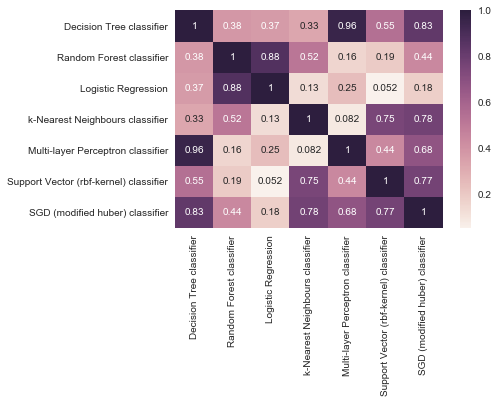

time: 293 ms


In [65]:
slclf_best.evaluate_base()

We can see that most of the base estimators are quite strong predictors, with the exception of Decision Tree classifier.  Random Forest and kNN are also a bit weaker than the others.  

A lot of the correlations between base estimators are weak but some are problematic.  The extremely high correlation between Multi-layer Perceptron classifier and Decision Tree classifier, combined with the latter's low predictive ability, make a good case for dropping Decision Trees from the base estimator set altogether (and as we saw in the grid search test above, it makes little to no positive difference to the predictive value of the overall algorithm).

The next strongest correlation is between Logistic Regresson and Random Forest.  There is a case for removing Random Forest, as Logistic Regression is a stronger predictor alone and is more weakly correlated to other estimators, but Random Forest itself is weakly enough correlated to the rest of the estimators to probably be worth preserving.  

The most strongly correlated estimator across the board is SGD classifier, and I think it makes sense to remove this from the set of base estimators as it functions here as the stack level classifier anyway.  If we remove just these two, our remaining set of base estimators corresponds to the 'accuracy_set' which was demonstrated in the gridsearch rankings to be equally as strong as the full or default sets (with more entries in the top ten than any other base estimator set), while being a little more efficient in terms of time.

We shall test using 'accuracy_set' as the base estimator set to see how it compares to the 'all_clfs' setting. 

In [79]:
slclf_best_accuracy_set = SuperLearnerClassifier(base_estimator_set = 'accuracy_set', bootstrapping = False, \
                                              proba_predict = True, stack_estimator = 'sgdc', n_jobs = 3, verbose = True)
slclf_best_accuracy_set.fit(X_train, y_train)

Generating layer one predictions for stack layer training 

	 Processing Random Forest classifier on fold 1
	 Processing Logistic Regression on fold 1
	 Processing k-Nearest Neighbours classifier on fold 1
	 Processing Multi-layer Perceptron classifier on fold 1
	 Processing Support Vector (rbf-kernel) classifier on fold 1
	 Fold 1 processed.
	 Stack-layer training predictions matrix size after processing fold 1 = (604, 50)  

	 Processing Random Forest classifier on fold 2
	 Processing Logistic Regression on fold 2
	 Processing k-Nearest Neighbours classifier on fold 2
	 Processing Multi-layer Perceptron classifier on fold 2
	 Processing Support Vector (rbf-kernel) classifier on fold 2
	 Fold 2 processed.
	 Stack-layer training predictions matrix size after processing fold 2 = (1206, 50)  

	 Processing Random Forest classifier on fold 3
	 Processing Logistic Regression on fold 3
	 Processing k-Nearest Neighbours classifier on fold 3
	 Processing Multi-layer Perceptron classifier on f

,Random Forest classifier,Logistic Regression,k-Nearest Neighbours classifier,Multi-layer Perceptron classifier,Support Vector (rbf-kernel) classifier
0,0.774834,0.846026,0.773179,0.847682,0.846026
1,0.775748,0.832226,0.784053,0.822259,0.830565
2,0.788686,0.816972,0.772047,0.821963,0.800333
3,0.730769,0.822742,0.777592,0.790970,0.832776
4,0.754622,0.818487,0.781513,0.820168,0.825210


Fitting stack layer estimator...
Done 

Fitting layer one estimators... 

	 Processing Random Forest classifier
	 Processing Logistic Regression
	 Processing k-Nearest Neighbours classifier
	 Processing Multi-layer Perceptron classifier
	 Processing Support Vector (rbf-kernel) classifier

 Super Learner fitting completed 



SuperLearnerClassifier(base_estimator_set='accuracy_set', bootstrapping=False,
            incl_orig_input=False, kfolds=5, n_jobs=3, proba_predict=True,
            stack_estimator='sgdc', verbose=True)

time: 2min 34s


In [80]:
# Make a set of predictions on the validation data
predictions = slclf_best_accuracy_set.predict(X_valid)
accuracy = accuracy_score(y_valid, predictions)

print("Classification Report: \n", classification_report(y_valid, predictions))

# Print accuracy
print("Accuracy: " +  str(accuracy))

# Print confusion matrix
print("\n Confusion Matrix:")
display(pd.crosstab(np.array(y_valid), predictions, rownames=['True'], colnames=['Predicted'], margins=True))

Generating base learner predictions... 

	 Processing base learner:  Random Forest classifier
	 Processing base learner:  Logistic Regression
	 Processing base learner:  k-Nearest Neighbours classifier
	 Processing base learner:  Multi-layer Perceptron classifier
	 Processing base learner:  Support Vector (rbf-kernel) classifier

 Generating stack learner predictions... 

Classification Report: 
              precision    recall  f1-score   support

          0       0.84      0.84      0.84       133
          1       0.95      0.97      0.96       119
          2       0.74      0.74      0.74       106
          3       0.84      0.85      0.85       120
          4       0.78      0.74      0.76       121
          5       0.90      0.93      0.92       119
          6       0.70      0.70      0.70       122
          7       0.92      0.86      0.89       128
          8       0.94      0.95      0.94       111
          9       0.93      0.97      0.95       121

avg / total    

Predicted,0,1,2,3,4,5,6,7,8,9,All
True,,,,,,,,,,,
0,112,0,3,9,1,0,7,0,1,0,133
1,1,116,0,1,0,0,1,0,0,0,119
2,1,0,78,0,13,0,13,0,1,0,106
3,5,4,1,102,3,0,4,0,1,0,120
4,0,1,16,2,89,0,11,0,2,0,121
5,0,0,0,0,0,111,0,6,0,2,119
6,15,1,7,3,8,0,86,0,2,0,122
7,0,0,0,0,0,11,0,110,0,7,128
8,0,0,1,4,0,0,0,1,105,0,111


time: 4.07 s


In [81]:
# Make a set of predictions on the hold-out test data
predictions = slclf_best_accuracy_set.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

print("Classification Report: \n", classification_report(y_test, predictions))

# Print accuracy
print("Accuracy: " +  str(accuracy))

# Print confusion matrix
print("\n Confusion Matrix:")
display(pd.crosstab(np.array(y_test), predictions, rownames=['True'], colnames=['Predicted'], margins=True))

Generating base learner predictions... 

	 Processing base learner:  Random Forest classifier
	 Processing base learner:  Logistic Regression
	 Processing base learner:  k-Nearest Neighbours classifier
	 Processing base learner:  Multi-layer Perceptron classifier
	 Processing base learner:  Support Vector (rbf-kernel) classifier

 Generating stack learner predictions... 

Classification Report: 
              precision    recall  f1-score   support

          0       0.79      0.81      0.80       200
          1       0.97      0.95      0.96       188
          2       0.73      0.83      0.78       162
          3       0.85      0.85      0.85       203
          4       0.80      0.75      0.77       173
          5       0.92      0.93      0.92       163
          6       0.62      0.57      0.59       196
          7       0.91      0.88      0.89       152
          8       0.92      0.96      0.94       192
          9       0.94      0.95      0.94       171

avg / total    

Predicted,0,1,2,3,4,5,6,7,8,9,All
True,,,,,,,,,,,
0,161,0,3,10,0,0,23,0,3,0,200
1,0,179,1,6,2,0,0,0,0,0,188
2,2,0,134,1,14,0,10,0,1,0,162
3,9,3,0,173,4,0,12,0,2,0,203
4,0,0,18,5,130,1,17,0,2,0,173
5,0,0,0,0,0,151,0,8,1,3,163
6,32,2,25,7,13,0,111,0,6,0,196
7,0,0,0,0,0,10,0,134,0,8,152
8,0,0,2,1,0,0,5,0,184,0,192


time: 5.81 s


Accuracy score per estimator per fold:


,Random Forest classifier,Logistic Regression,k-Nearest Neighbours classifier,Multi-layer Perceptron classifier,Support Vector (rbf-kernel) classifier
0,0.774834,0.846026,0.773179,0.847682,0.846026
1,0.775748,0.832226,0.784053,0.822259,0.830565
2,0.788686,0.816972,0.772047,0.821963,0.800333
3,0.730769,0.822742,0.777592,0.790970,0.832776
4,0.754622,0.818487,0.781513,0.820168,0.825210


Average accuracy score per estimator:


Random Forest classifier                  0.764932
Logistic Regression                       0.827291
k-Nearest Neighbours classifier           0.777677
Multi-layer Perceptron classifier         0.820609
Support Vector (rbf-kernel) classifier    0.826982
dtype: float64

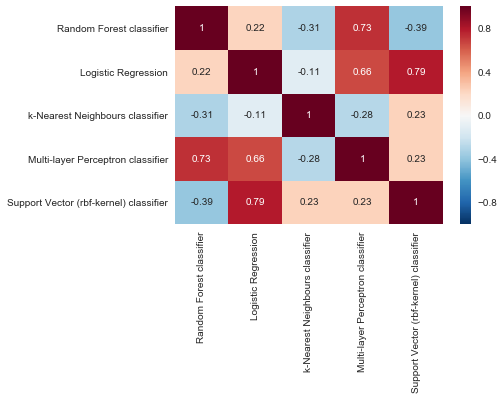

time: 226 ms


In [82]:
slclf_best_accuracy_set.evaluate_base()

We see that accuracy_set as base estimator set does indeed perform a little better than all_clfs in terms of accuracy on both the validation and test set.